### Ödev6 EK

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft

%matplotlib notebook

from scipy.io import loadmat

C:\Users\emircan\AppData\Local\Temp\ipykernel_17728\512651694.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<IPython.core.display.Javascript object>


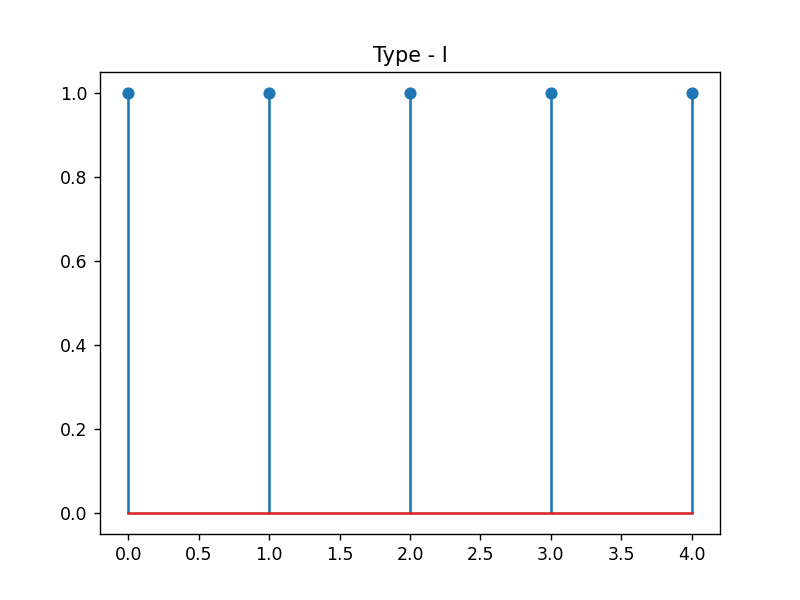

<IPython.core.display.Javascript object>


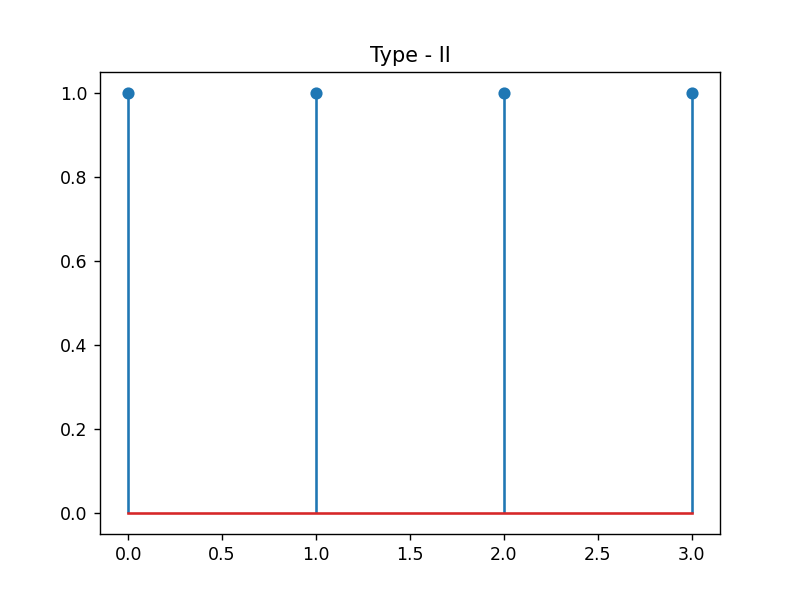

<IPython.core.display.Javascript object>


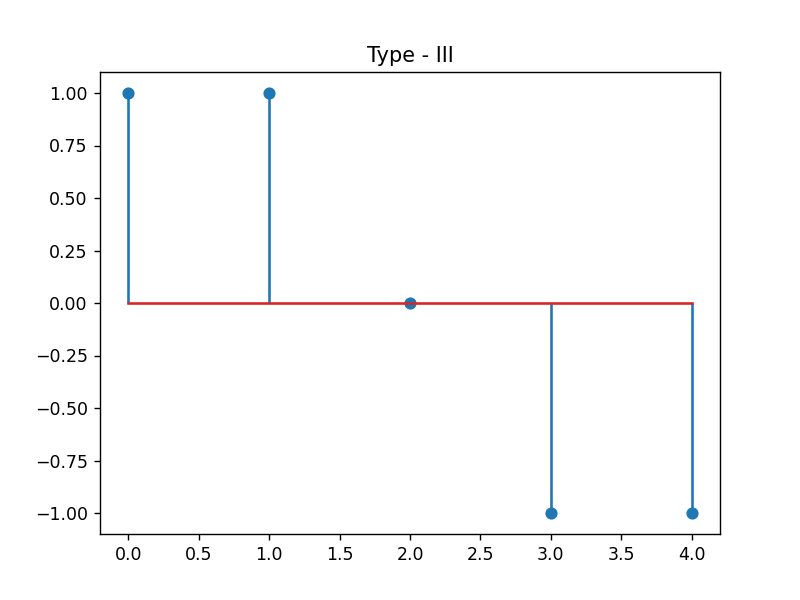

<IPython.core.display.Javascript object>


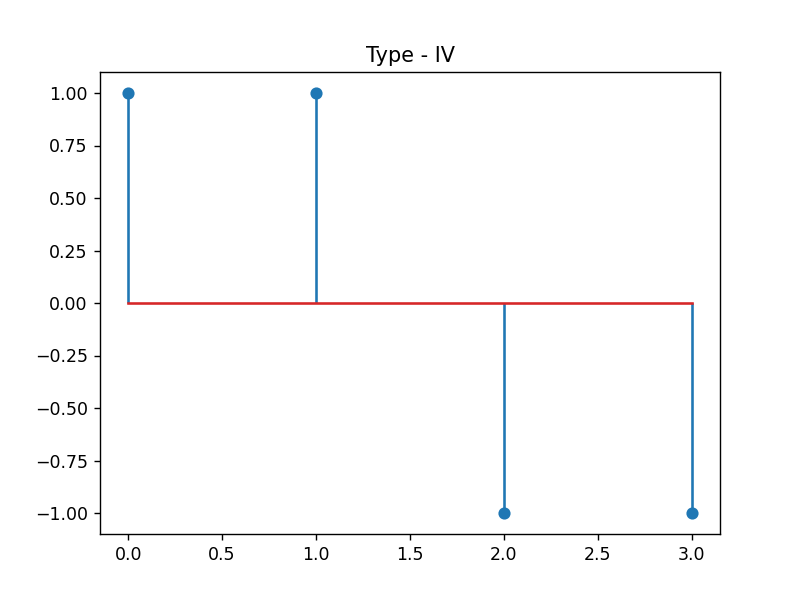

<IPython.core.display.Javascript object>


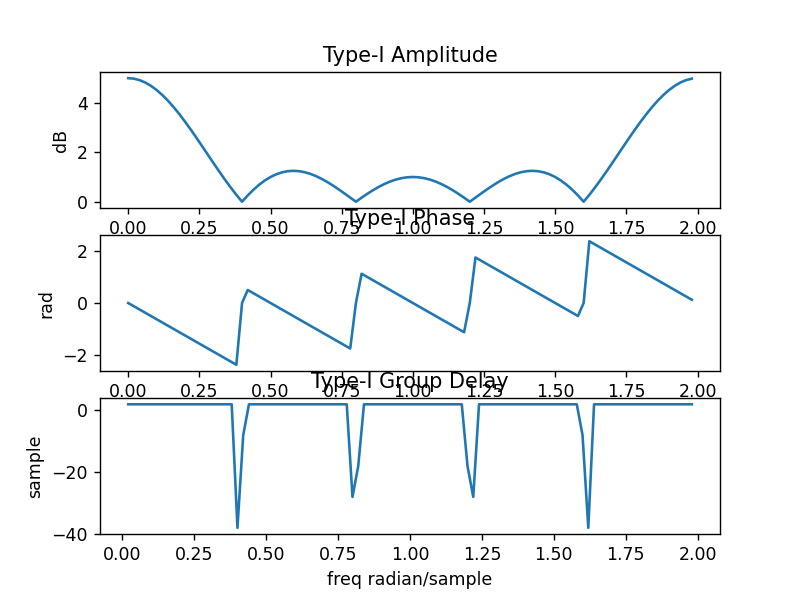

<IPython.core.display.Javascript object>


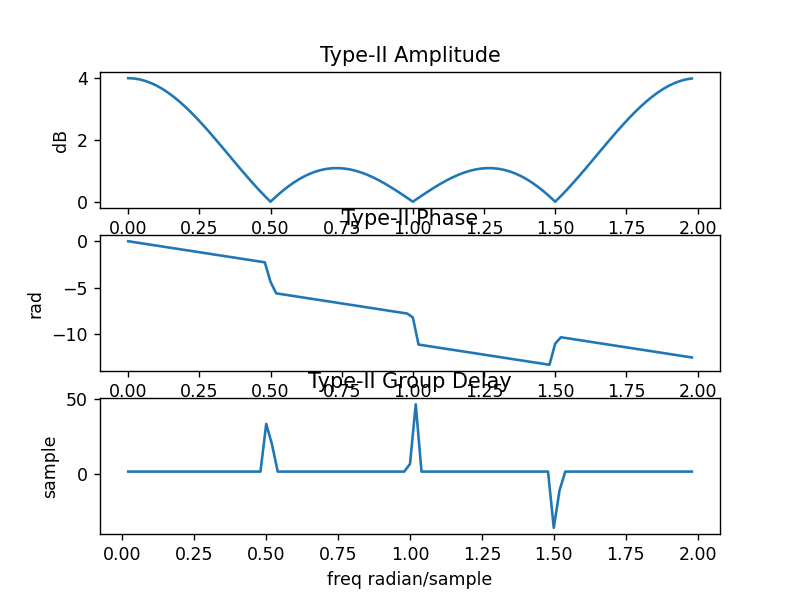

<IPython.core.display.Javascript object>


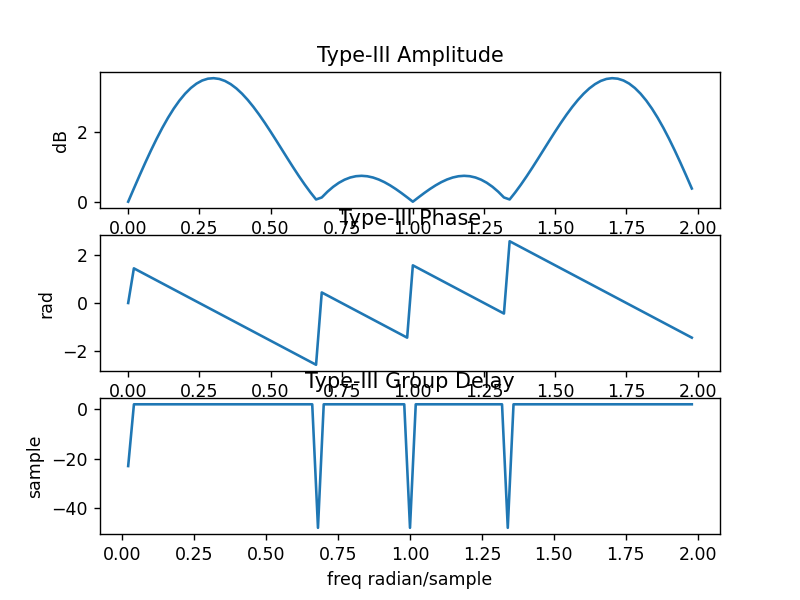

<IPython.core.display.Javascript object>


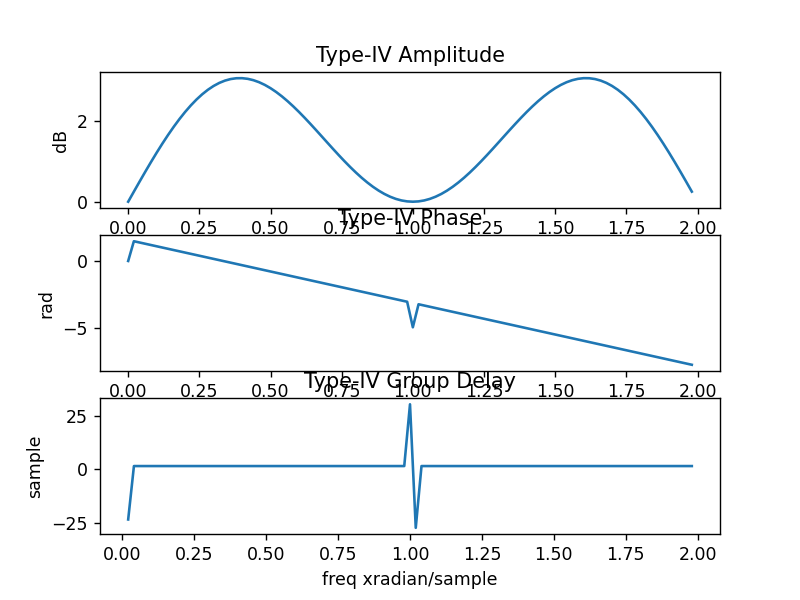

Text(0, 0.5, 'sample')

In [29]:
#Type-I
n_T1 = np.arange(0, 5, 1)
hn_T1 = np.array([1,1,1,1,1]) 

plt.figure()
plt.stem(hn_T1)
plt.title("Type - I")
#Type-II
n_T2 = np.arange(0, 4, 1)
hn_T2 = np.array([1,1,1,1])

plt.figure()
plt.stem(hn_T2)
plt.title("Type - II")
#Type-III
n_T3 = np.arange(0, 5, 1)
hn_T3 = np.array([1,1,0,-1,-1]) 

plt.figure()
plt.stem(hn_T3)
plt.title("Type - III")
#Type-IV
n_T4 = np.arange(0, 4, 1)
hn_T4 = np.array([1,1,-1,-1])

plt.figure()
plt.stem(hn_T4)
plt.title("Type - IV")
#0,2pi aralığında 100 noktalı w
N = 100
w = np.linspace(0, 2*np.pi-2*np.pi/N, N)

#Fourier Transform
Hw_T1 = np.fft.fft(hn_T1, N)  
Hw_T2 = np.fft.fft(hn_T2, N) 
Hw_T3 = np.fft.fft(hn_T3, N)
Hw_T4 = np.fft.fft(hn_T4, N)


#sürekli Faz fonksiyonları
Hw_phase1 = np.unwrap(np.angle(Hw_T1))
Hw_phase2 = np.unwrap(np.angle(Hw_T2))
Hw_phase3 = np.unwrap(np.angle(Hw_T3))   
Hw_phase4 = np.unwrap(np.angle(Hw_T4)) 


#Grup Gecikmeleri
tau_w_T1 = -np.diff(Hw_phase1) * (N/(2*np.pi))  
tau_w_T2 = -np.diff(Hw_phase2) * (N/(2*np.pi))  
tau_w_T3 = -np.diff(Hw_phase3) * (N/(2*np.pi))  
tau_w_T4 = -np.diff(Hw_phase4) * (N/(2*np.pi))  

  
#Grafiklerin çizdirilmesi
fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(w/np.pi, abs(Hw_T1))
ax1.title.set_text("Type-I Amplitude")
ax1.set_ylabel("dB")
ax2.plot(w/np.pi, Hw_phase1)
ax2.title.set_text("Type-I Phase")
ax2.set_ylabel("rad")
ax3.plot(w[1::]/np.pi, tau_w_T1)
plt.xlabel("freq radian/sample")
ax3.title.set_text("Type-I Group Delay")
ax3.set_ylabel("sample")


fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(w/np.pi, abs(Hw_T2))
ax1.title.set_text("Type-II Amplitude")
ax1.set_ylabel("dB")
ax2.plot(w/np.pi, Hw_phase2)
ax2.title.set_text("Type-II Phase")
ax2.set_ylabel('rad')
ax3.plot(w[1::]/np.pi, tau_w_T2)
plt.xlabel("freq radian/sample")
ax3.title.set_text('Type-II Group Delay')
ax3.set_ylabel("sample")


fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(w/np.pi, abs(Hw_T3))
ax1.title.set_text("Type-III Amplitude")
ax1.set_ylabel("dB")
ax2.plot(w/np.pi, Hw_phase3)
ax2.title.set_text("Type-III Phase")
ax2.set_ylabel("rad")
ax3.plot(w[1::]/np.pi, tau_w_T3)
plt.xlabel("freq radian/sample")
ax3.title.set_text("Type-III Group Delay")
ax3.set_ylabel("sample")


fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(w/np.pi, abs(Hw_T4))
ax1.title.set_text("Type-IV Amplitude")
ax1.set_ylabel("dB")
ax2.plot(w/np.pi, Hw_phase4)
ax2.title.set_text("Type-IV Phase")
ax2.set_ylabel("rad")
ax3.plot(w[1::]/np.pi, tau_w_T4)
plt.xlabel("freq xradian/sample")
ax3.title.set_text("Type-IV Group Delay")
ax3.set_ylabel("sample")


In [30]:
#Z Dönüşümü fonksiyonu:
def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()



<IPython.core.display.Javascript object>


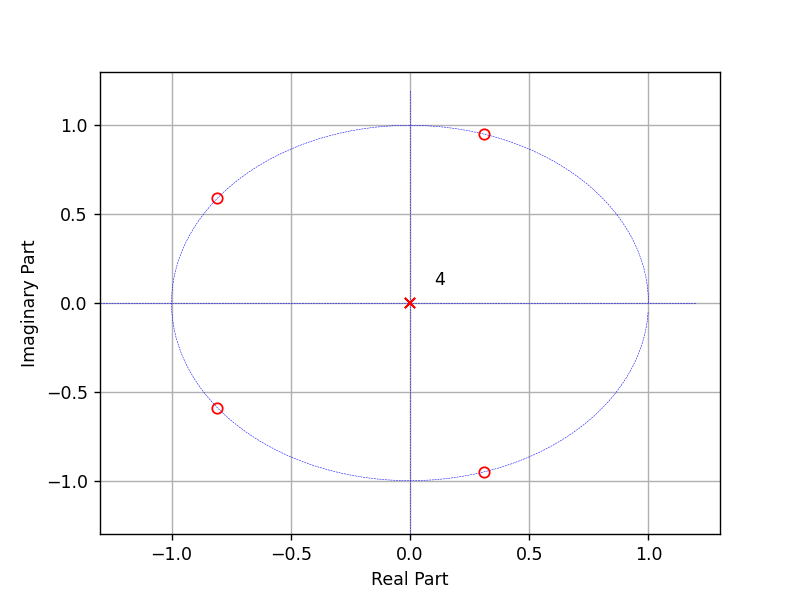

<IPython.core.display.Javascript object>


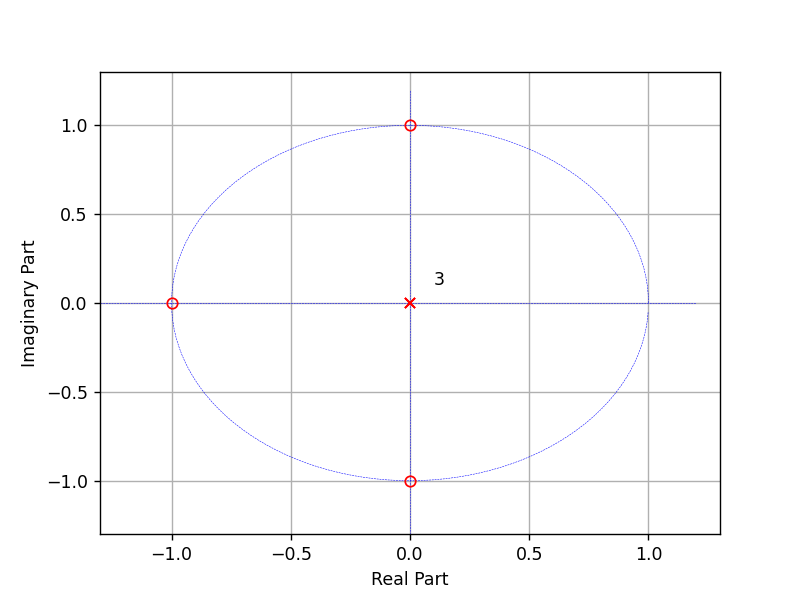

<IPython.core.display.Javascript object>


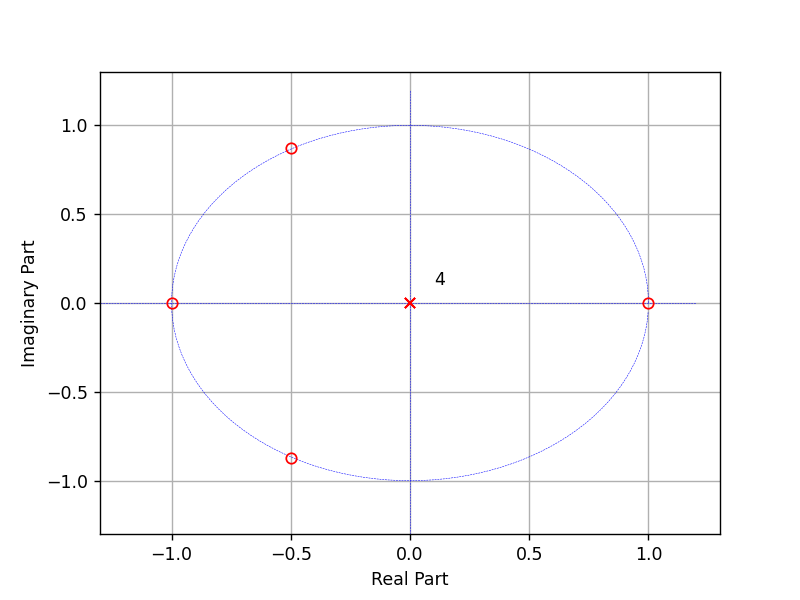

<IPython.core.display.Javascript object>


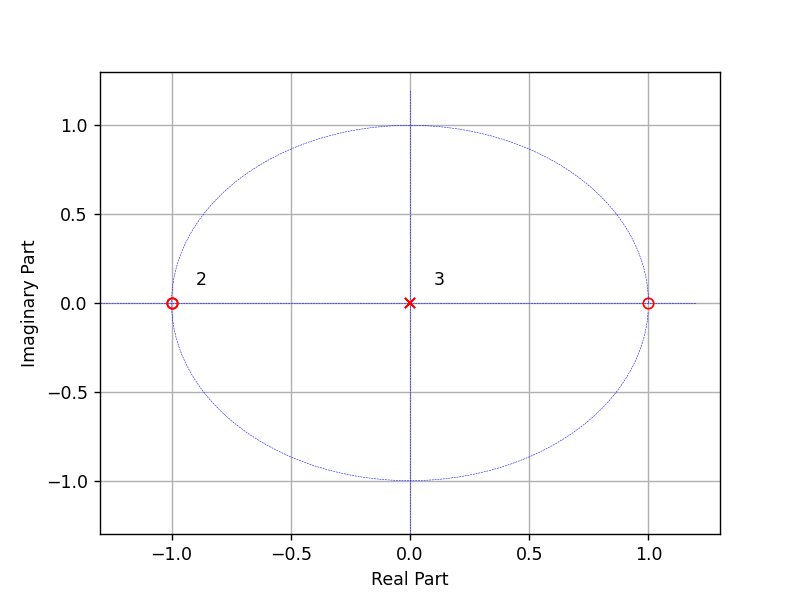

In [31]:
#Z Dönüşümleri:
num = np.array([1,1,1,1,1]) 
denum = np.array([1,0,0,0,0]) 
zplane(num, denum)

num = np.array([1,1,1,1])
denum = np.array([1,0,0,0])
zplane(num, denum)

num = np.array([1,1,0,-1,-1])
denum = np.array([1,0,0,0,0])
zplane(num, denum)

num = np.array([1,1,-1,-1])
denum = np.array([1,0,0,0])
zplane(num, denum)

### Soru2

<IPython.core.display.Javascript object>


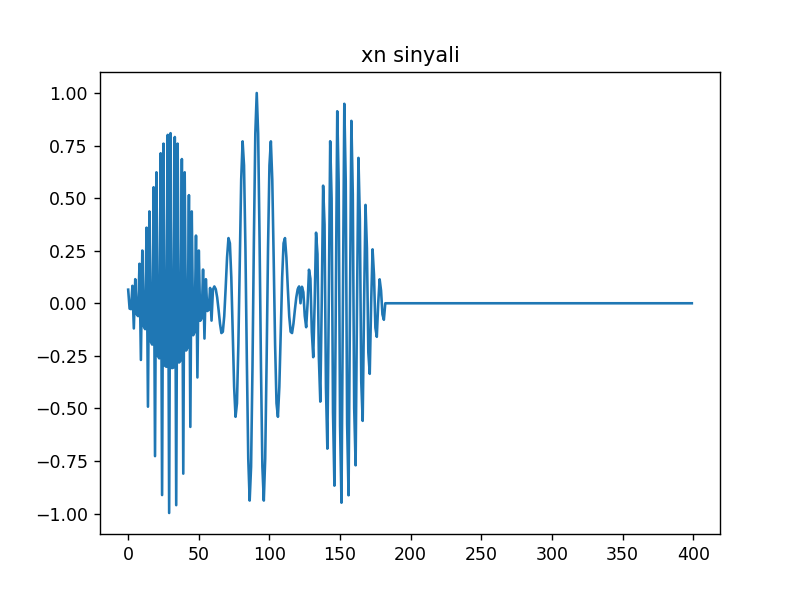

Text(0.5, 1.0, 'xn sinyali')

In [24]:
#xn
N = 400
M = 60

n1 = np.arange(0, M+1, 1)
wn = 0.54 - 0.46 * np.cos(2*np.pi*n1/M)

x1 = wn*np.cos(0.2*np.pi*n1)
x2 = wn*np.cos(0.4*np.pi*n1-np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n1-np.pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis = None)

plt.figure()
plt.plot(xn)
plt.title("xn sinyali")


C:\Users\emircan\AppData\Local\Temp\ipykernel_17728\3729370169.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


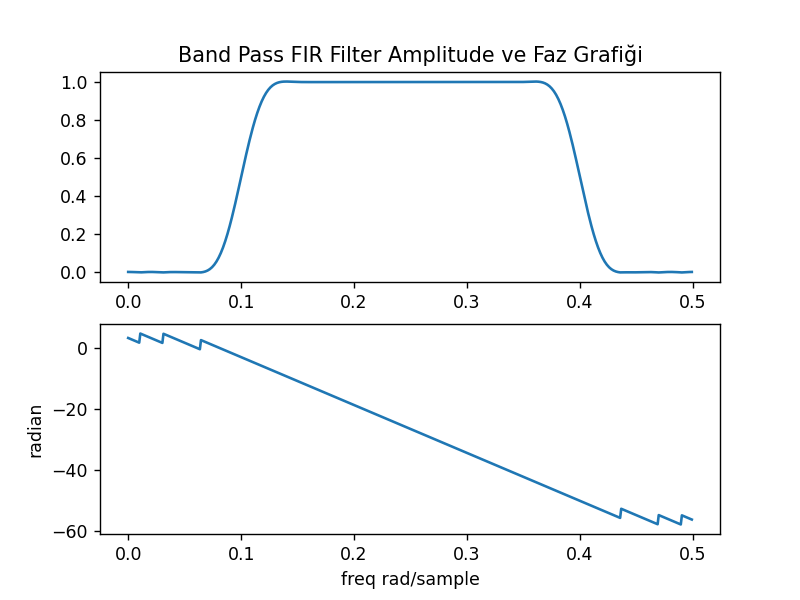

<IPython.core.display.Javascript object>


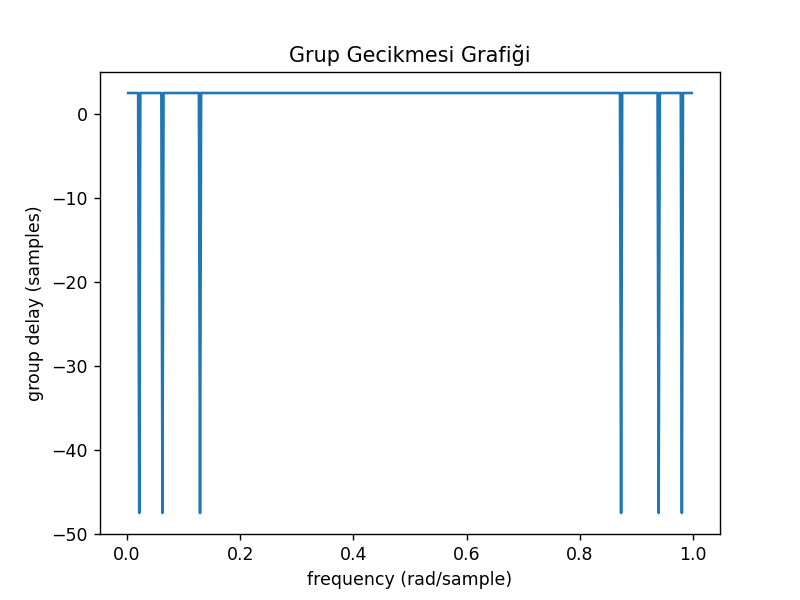

<IPython.core.display.Javascript object>


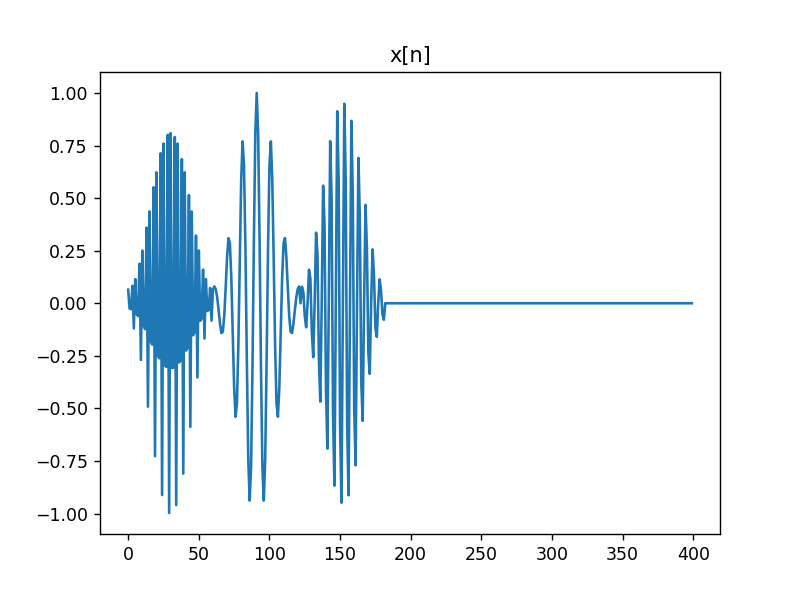

<IPython.core.display.Javascript object>


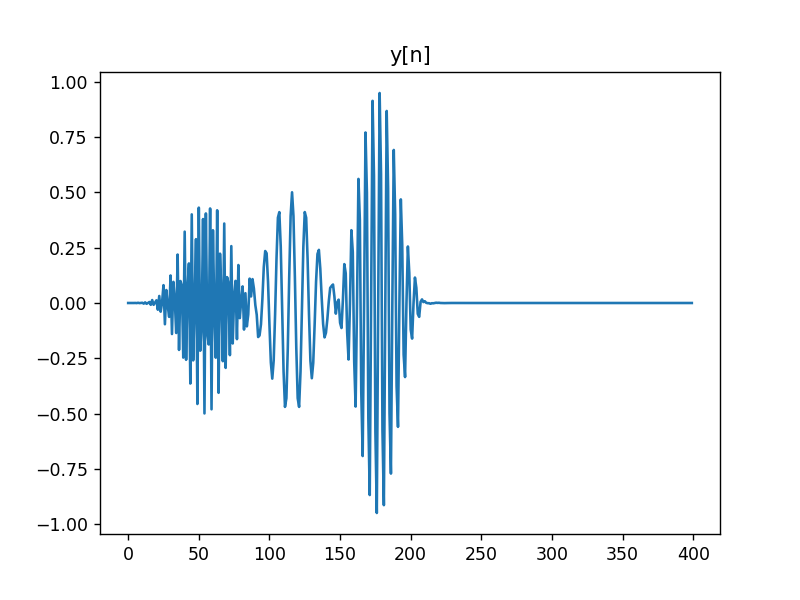

Text(0.5, 1.0, 'y[n]')

In [32]:
#Band pass
filter_data = loadmat('emirBPF.mat') 
Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]


w, Hw = sgnl.freqz(b, 1)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.title.set_text("Band Pass FIR Filter Amplitude ve Faz Grafiği")
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel("radian")
plt.xlabel("freq rad/sample")


plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")


yn = sgnl.lfilter(b, 1, xn)

plt.figure()
plt.plot(xn)
plt.title("x[n]")

plt.figure()
plt.plot(yn)
plt.title("y[n]")

C:\Users\emircan\AppData\Local\Temp\ipykernel_17728\1715859951.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


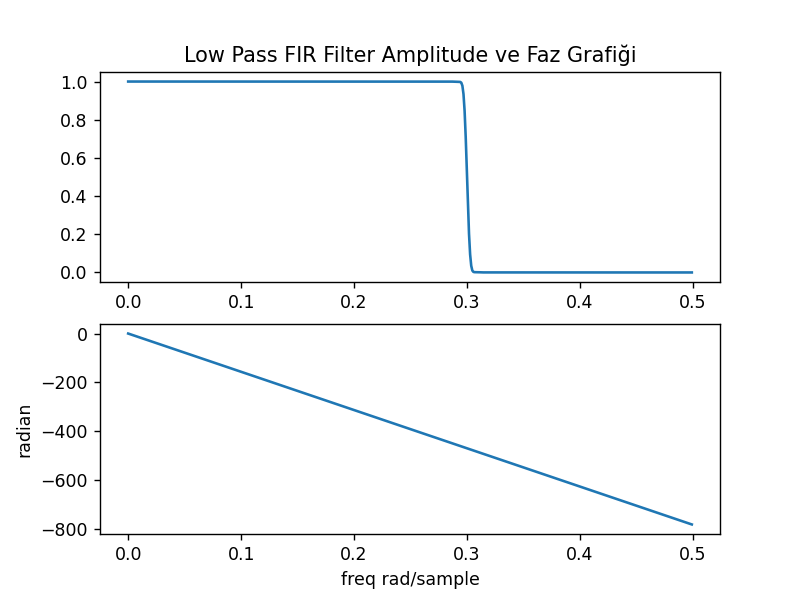

<IPython.core.display.Javascript object>


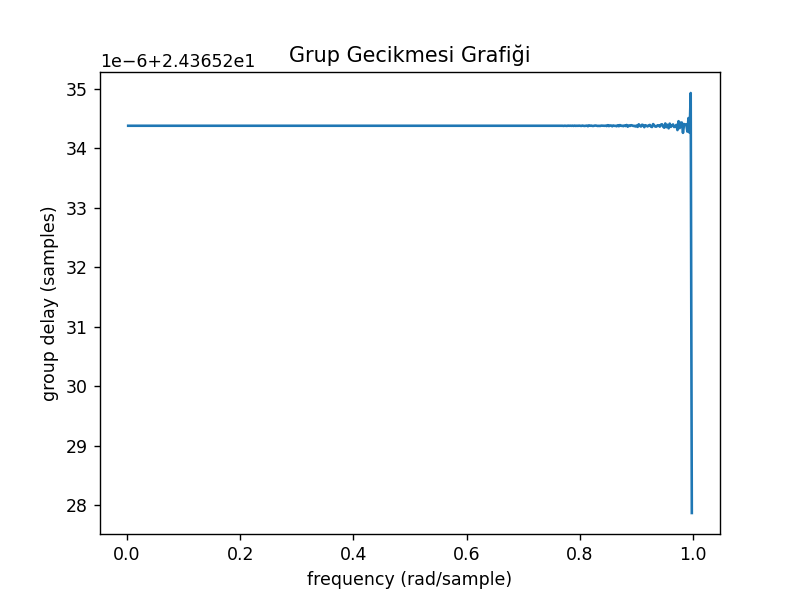

<IPython.core.display.Javascript object>


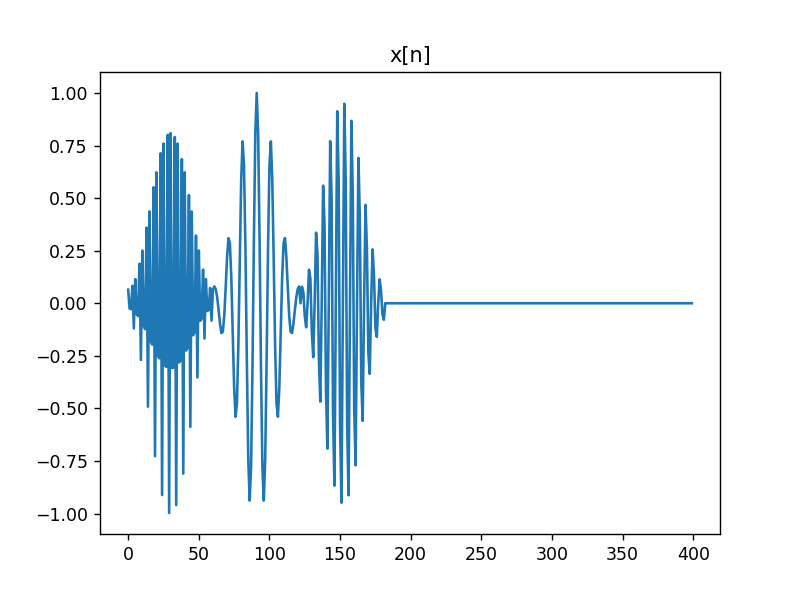

<IPython.core.display.Javascript object>


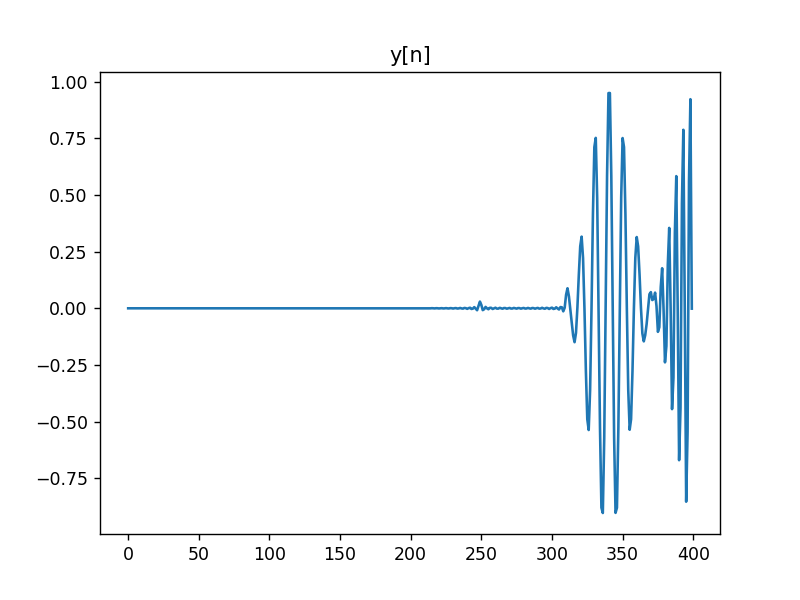

Text(0.5, 1.0, 'y[n]')

In [34]:
#Low pass
filter_data = loadmat("emirLPF2.mat")
#print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]


w, Hw = sgnl.freqz(b, 1)
Hw_mag = np.abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/(2*np.pi), Hw_mag)
ax2.plot(w/(2*np.pi), Hw_phs), plt.ylabel("radian")
plt.xlabel("freq rad/sample")
ax1.title.set_text("Low Pass FIR Filter Amplitude ve Faz Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

yn = sgnl.lfilter(b, 1, xn)

plt.figure()
plt.plot(xn)
plt.title("x[n]")

plt.figure()
plt.plot(yn)
plt.title("y[n]")

### Soru2 IIR Filtreleri

C:\Users\emircan\AppData\Local\Temp\ipykernel_17728\1224380934.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


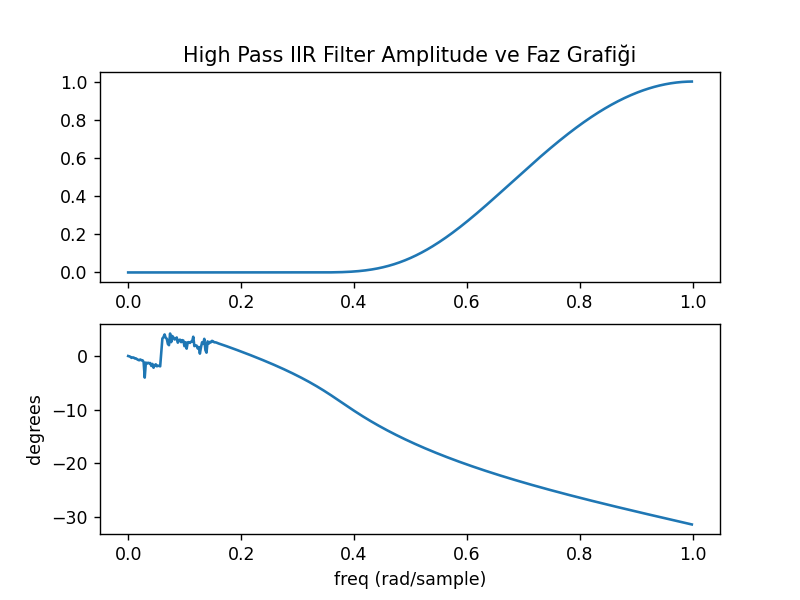

<IPython.core.display.Javascript object>


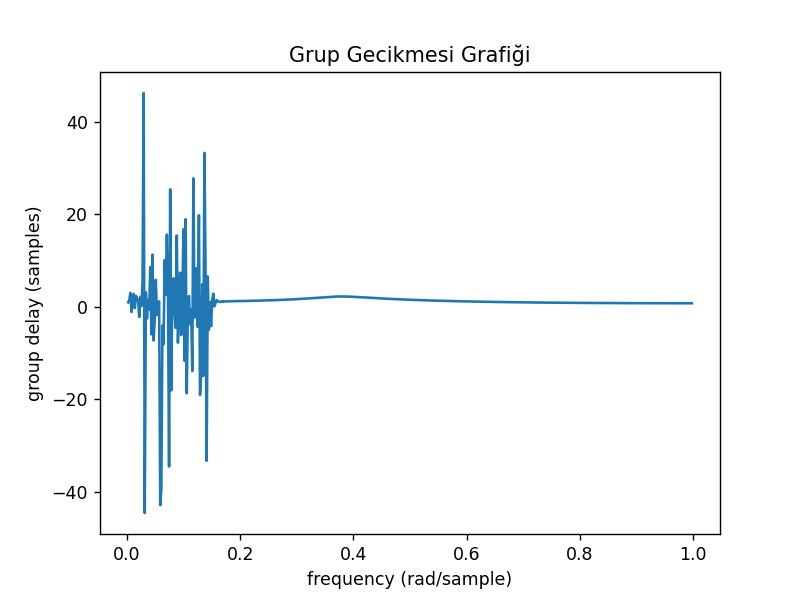

<IPython.core.display.Javascript object>


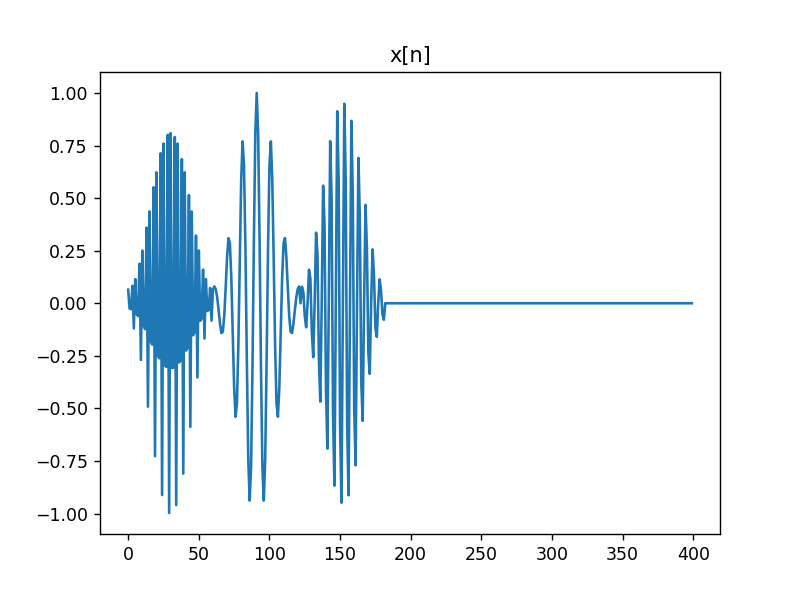

<IPython.core.display.Javascript object>


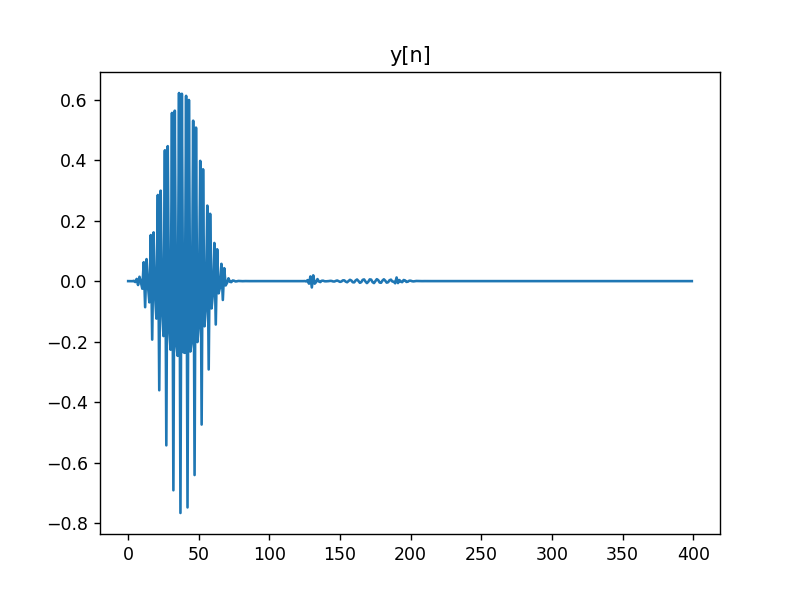

Text(0.5, 1.0, 'y[n]')

In [35]:
#High Pass IIR
filter_data = loadmat("emirHPF2.mat")
#print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]
a = Coeffs[1, :]

#print(Coeffs)
#print(b)
#print(a)

w, Hw = sgnl.freqz(b, a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)

plt.ylabel("degrees")
plt.xlabel("freq (rad/sample)")
ax1.title.set_text("High Pass IIR Filter Amplitude ve Faz Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

yn = sgnl.lfilter(b, a, xn)

plt.figure()
plt.plot(xn)
plt.title("x[n]")

plt.figure()
plt.plot(yn)
plt.title("y[n]")

C:\Users\emircan\AppData\Local\Temp\ipykernel_17728\3669688170.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Coeffs = filter_data["ba"].astype(np.float)


<IPython.core.display.Javascript object>


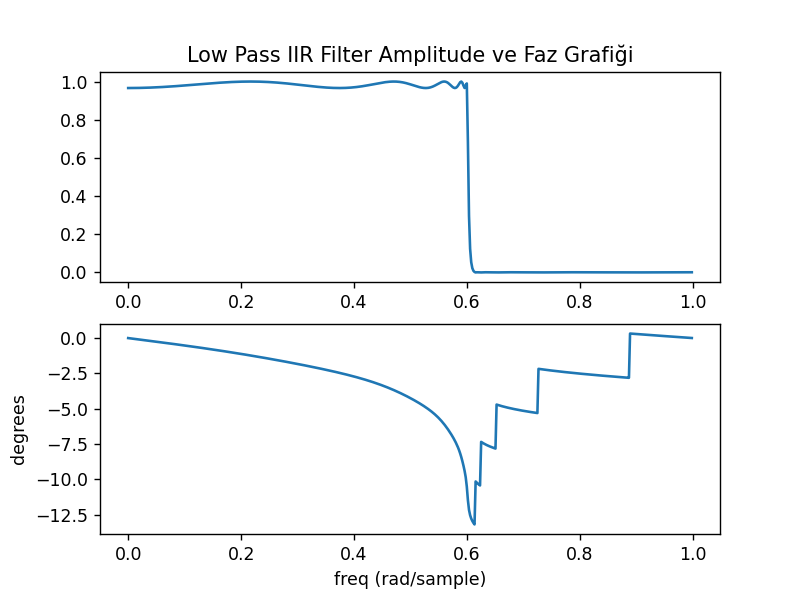

<IPython.core.display.Javascript object>


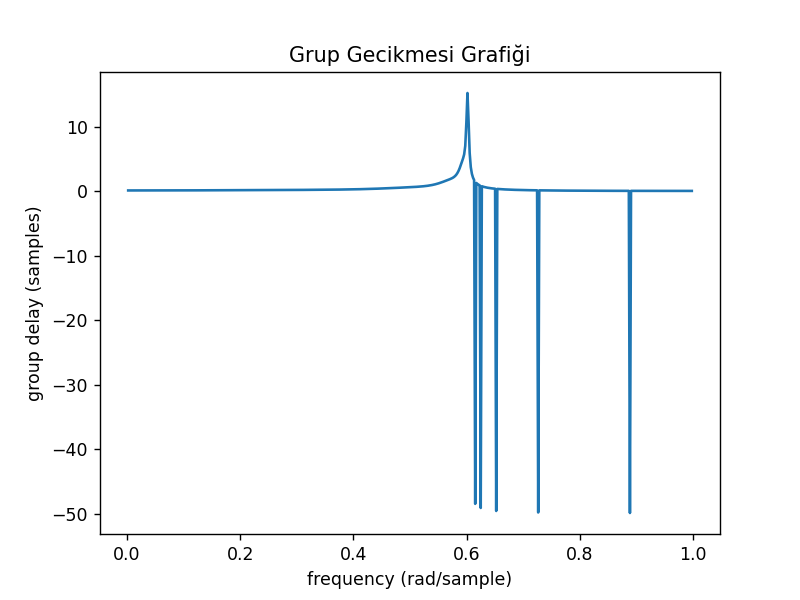

<IPython.core.display.Javascript object>


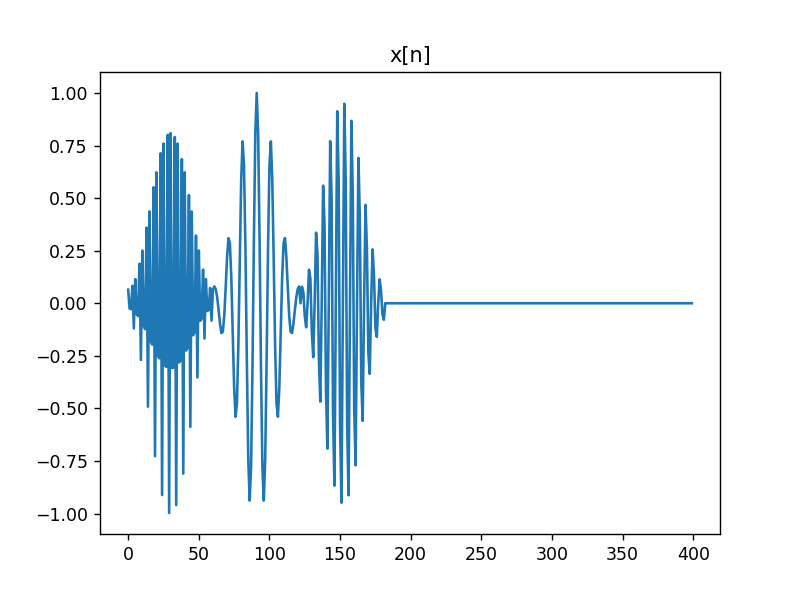

<IPython.core.display.Javascript object>


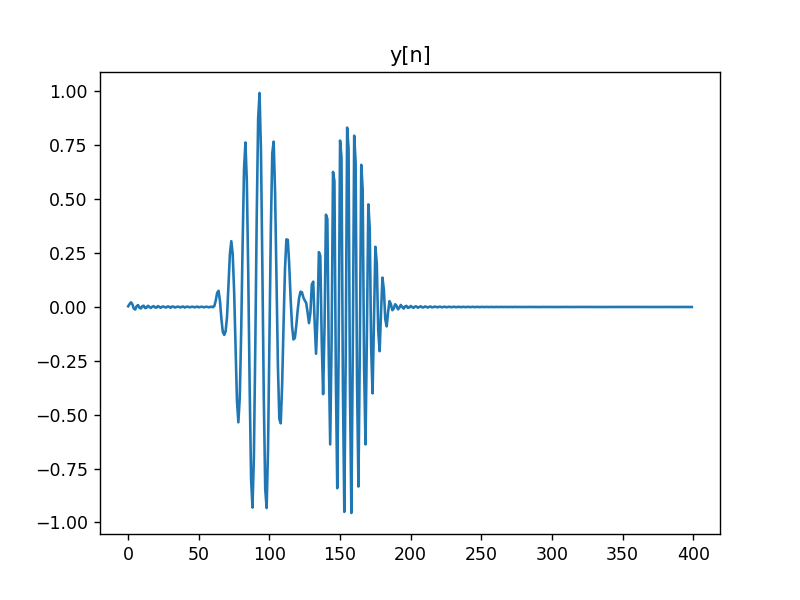

Text(0.5, 1.0, 'y[n]')

In [39]:
#Low Pass IIR
filter_data = loadmat("emirLPF3.mat")
#print(filter_data)

Coeffs = filter_data["ba"].astype(np.float)

b = Coeffs[0,:]
a = Coeffs[1, :]

#print(Coeffs)
#print(b)
#print(a)

w, Hw = sgnl.freqz(b, a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)

plt.ylabel("degrees")
plt.xlabel("freq (rad/sample)")
ax1.title.set_text("Low Pass IIR Filter Amplitude ve Faz Grafiği")

plt.figure()
tau_w = -np.diff(Hw_phs) * (N/(2*np.pi))
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel("frequency (rad/sample)")
plt.ylabel("group delay (samples)")
plt.title("Grup Gecikmesi Grafiği")

yn = sgnl.lfilter(b, a, xn)

plt.figure()
plt.plot(xn)
plt.title("x[n]")

plt.figure()
plt.plot(yn)
plt.title("y[n]")

### Soru2 Gözlemler:

#### Filtreler beklendiği gibi çalışmaktadır, örneğin 0.6pi altındakilerin hepsini yukarıdaki grafikte geçirdiğini görebilirsiniz.
#### en iyi tasarlanmış filtrem üstteki IIR low pass filtresidir, onu 0.6pi altındakileri geçirmesi için yaptım, oldukça az bir grup gecikmesi var geçen sinyaller çok net bir şekilde görülebiliyor.
#### Filtrenin grup gecikmelerinin sinyali nasıl etkilediğini FIR LP filtresinde çok net görebilirsiniz, filtreden geçen sinyal oldukça sağa kaymış görünüyor.
#### Filtre derecesi arttıkça kesim frekanslarının daha düz bir çizgi olarak düştüğünü görebiliriz.